<a href="https://colab.research.google.com/github/raflilksmnaaa/Capstone-Project-Hacktiv8-Rafli/blob/main/Stock_Data_IBM_Granite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain_community replicate matplotlib seaborn plotly

In [43]:
from langchain_community.llms import Replicate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
import os
from google.colab import userdata

class StockAnalyzer:
    def __init__(self):
        self.setup_model()
        self.df = None

    def setup_model(self):
        """Initialize IBM Granite model with optimized parameters"""
        try:
            api_token = userdata.get('REPLICATE_API_TOKEN')
            os.environ["REPLICATE_API_TOKEN"] = api_token

            self.model = Replicate(
                model="ibm-granite/granite-3.3-8b-instruct",
                replicate_api_token=api_token,
                temperature=0.7
            )
            self.model_params = {
                "top_k": 5,
                "top_p": 0.9,
                "max_tokens": 8000,
                "min_tokens": 1000,
                "temperature": 0.3,
                "repetition_penalty": 1.1,
            }
            print("ibm-granite/granite-3.3-8b-instruct initialized successfully!")

        except Exception as e:
            print(f"Error initializing model: {e}")

    def load_data(self, file_path='csvjson.json'):
        """Enhanced data loading with validation and preprocessing"""
        try:
            # buat coba berbagai format file
            if file_path.endswith('.json'):
                self.df = pd.read_json('csvjson')
            elif file_path.endswith('.csv'):
                self.df = pd.read_csv('stock_market_chunk_1')
            else:
                print("Unsupported file format. Trying CSV...")
                self.df = pd.read_csv('stock_market2025')

            print(f"Dataset loaded successfully! Shape: {self.df.shape}")
            self.validate_data()
            self.preprocess_data()

        except Exception as e:
            print(f"Error loading data: {e}")

    def validate_data(self):
        """Validate data quality and structure"""
        print("\n Data Validation:")
        print(f"• Rows: {len(self.df)}")
        print(f"• Columns: {len(self.df.columns)}")
        print(f"• Missing values: {self.df.isnull().sum().sum()}")
        print(f"• Duplicate rows: {self.df.duplicated().sum()}")

        required_cols = ['Ticker', 'Close Price', 'PE Ratio', 'Sector']
        missing_cols = [col for col in required_cols if col not in self.df.columns]
        if missing_cols:
            print(f"Missing required columns: {missing_cols}")

    def preprocess_data(self):
        """Enhanced data preprocessing"""
        print("\n Data Preprocessing:")

        if 'Date' in self.df.columns:
            self.df['Date'] = pd.to_datetime(self.df['Date'])
            print("• Date column converted to datetime")

        if 'Open Price' in self.df.columns and 'Close Price' in self.df.columns:
            self.df['Daily_Return'] = ((self.df['Close Price'] - self.df['Open Price']) / self.df['Open Price']) * 100
            print("• Daily return calculated")

        if 'High Price' in self.df.columns and 'Low Price' in self.df.columns:
            self.df['Volatility'] = ((self.df['High Price'] - self.df['Low Price']) / self.df['Close Price']) * 100
            print("• Volatility metric calculated")

        self.df = self.df.replace([np.inf, -np.inf], np.nan)
        print(f"• Data preprocessing completed!")

In [44]:
class StockAnalyzer:
    def __init__(self):
        self.setup_model()
        self.df = None

    def setup_model(self):
        """Initialize IBM Granite model with optimized parameters"""
        try:
            api_token = userdata.get('REPLICATE_API_TOKEN')
            os.environ["REPLICATE_API_TOKEN"] = api_token

            self.model = Replicate(
                model="ibm-granite/granite-3.3-8b-instruct",
                replicate_api_token=api_token,
            )


            self.model_params = {
                "top_k": 5,
                "top_p": 0.9,
                "max_tokens": 8000,
                "min_tokens": 1000,
                "temperature": 0.3,
                "repetition_penalty": 1.1,
            }
            print("ibm-granite/granite-3.3-8b-instruct initialized successfully!")

        except Exception as e:
            print(f"Error initializing model: {e}")

    def load_data(self, file_path='csvjson.json'):
        """Enhanced data loading with validation and preprocessing"""
        try:
            if file_path.endswith('.json'):
                self.df = pd.read_json(file_path)
            elif file_path.endswith('.csv'):
                self.df = pd.read_csv(file_path)
            else:
                print("Unsupported file format. Trying CSV...")
                self.df = pd.read_csv(file_path)

            print(f"Dataset loaded successfully! Shape: {self.df.shape}")
            self.validate_data()
            self.preprocess_data()
            return True

        except FileNotFoundError:
            print(f"File '{file_path}' not found. Please check the path.")
            return False
        except Exception as e:
            print(f"Error loading data: {e}")
            return False

In [45]:
def validate_data(self):
    """Validate data quality and structure"""
    print("\n Data Validation:")
    print(f"• Rows: {len(self.df)}")
    print(f"• Columns: {len(self.df.columns)}")
    print(f"• Missing values: {self.df.isnull().sum().sum()}")
    print(f"• Duplicate rows: {self.df.duplicated().sum()}")

    required_cols = ['Ticker', 'Close Price', 'PE Ratio', 'Sector']
    missing_cols = [col for col in required_cols if col not in self.df.columns]
    if missing_cols:
        print(f" Missing required columns: {missing_cols}")

def preprocess_data(self):
    """Enhanced data preprocessing"""
    print("\n Data Preprocessing:")

    if 'Date' in self.df.columns:
        self.df['Date'] = pd.to_datetime(self.df['Date'])
        print("• Date column converted to datetime")

    if 'Open Price' in self.df.columns and 'Close Price' in self.df.columns:
        self.df['Daily_Return'] = ((self.df['Close Price'] - self.df['Open Price']) / self.df['Open Price']) * 100
        print("• Daily return calculated")

    if 'High Price' in self.df.columns and 'Low Price' in self.df.columns:
        self.df['Volatility'] = ((self.df['High Price'] - self.df['Low Price']) / self.df['Close Price']) * 100
        print("• Volatility metric calculated")

    self.df = self.df.replace([np.inf, -np.inf], np.nan)
    print(f"• Data preprocessing completed!")


StockAnalyzer.validate_data = validate_data
StockAnalyzer.preprocess_data = preprocess_data

print("Data validation and preprocessing methods added to StockAnalyzer class")

Data validation and preprocessing methods added to StockAnalyzer class


In [46]:
def generate_summary_stats(self):
    """Generate comprehensive summary statistics"""
    print("\n Generating Summary Statistics...")

    numeric_cols = self.df.select_dtypes(include=[np.number]).columns
    summary = self.df[numeric_cols].describe()

    if 'Sector' in self.df.columns:
        sector_dist = self.df['Sector'].value_counts()
        print(f"• Sectors in dataset: {len(sector_dist)}")
        print(f"• Top 3 sectors: {sector_dist.head(3).to_dict()}")

    return summary


StockAnalyzer.generate_summary_stats = generate_summary_stats

In [47]:
def create_visualizations(self):
    """Create insightful visualizations"""
    print("\n Creating Visualizations...")

    plt.style.use('default')
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))


    if 'Sector' in self.df.columns and 'Close Price' in self.df.columns:
        sector_perf = self.df.groupby('Sector')['Close Price'].mean().sort_values(ascending=False)
        sector_perf.plot(kind='bar', ax=axes[0,0], color='skyblue')
        axes[0,0].set_title('Average Stock Price by Sector')
        axes[0,0].set_xlabel('Sector')
        axes[0,0].set_ylabel('Average Close Price ($)')
        axes[0,0].tick_params(axis='x', rotation=45)


    if 'PE Ratio' in self.df.columns:
        pe_clean = self.df['PE Ratio'].dropna()
        pe_clean = pe_clean[(pe_clean > 0) & (pe_clean < 100)]
        axes[0,1].hist(pe_clean, bins=30, color='lightgreen', alpha=0.7)
        axes[0,1].set_title('PE Ratio Distribution')
        axes[0,1].set_xlabel('PE Ratio')
        axes[0,1].set_ylabel('Frequency')


    if 'Volume Traded' in self.df.columns and 'Market Cap' in self.df.columns:
        axes[1,0].scatter(self.df['Market Cap'], self.df['Volume Traded'], alpha=0.6, color='coral')
        axes[1,0].set_title('Market Cap vs Trading Volume')
        axes[1,0].set_xlabel('Market Cap')
        axes[1,0].set_ylabel('Volume Traded')
        axes[1,0].set_xscale('log')
        axes[1,0].set_yscale('log')


    if 'Dividend Yield' in self.df.columns and 'PE Ratio' in self.df.columns:
        clean_data = self.df[['Dividend Yield', 'PE Ratio']].dropna()
        clean_data = clean_data[(clean_data['PE Ratio'] > 0) & (clean_data['PE Ratio'] < 50)]
        axes[1,1].scatter(clean_data['PE Ratio'], clean_data['Dividend Yield'], alpha=0.6, color='gold')
        axes[1,1].set_title('PE Ratio vs Dividend Yield')
        axes[1,1].set_xlabel('PE Ratio')
        axes[1,1].set_ylabel('Dividend Yield (%)')

    plt.tight_layout()
    plt.show()


StockAnalyzer.create_visualizations = create_visualizations

In [48]:
def prepare_analysis_data(self, sample_size=None):
    """Prepare optimized dataset for analysis"""
    if sample_size and len(self.df) > sample_size:
        if 'Sector' in self.df.columns:
            sampled_df = self.df.groupby('Sector').apply(
                lambda x: x.sample(min(len(x), sample_size // self.df['Sector'].nunique()))
            ).reset_index(drop=True)
        else:
            sampled_df = self.df.sample(sample_size)
        print(f" Data sampled to {len(sampled_df)} rows for analysis")
        return sampled_df
    return self.df

def create_comprehensive_prompt(self, analysis_data):
    """Create an enhanced, structured prompt for better analysis"""

    summary_stats = analysis_data.describe()
    sector_info = ""
    if 'Sector' in analysis_data.columns:
        sector_dist = analysis_data['Sector'].value_counts()
        sector_info = f"\nSector Distribution: {dict(sector_dist.head())}"

    prompt = f"""
    As a senior financial analyst, conduct a comprehensive analysis of this stock market dataset.

    DATASET OVERVIEW:
    - Total Records: {len(analysis_data)}
    - Columns: {list(analysis_data.columns)}
    {sector_info}

    KEY STATISTICS:
    - Average Close Price: ${summary_stats.loc['mean', 'Close Price']:.2f}
    - Average PE Ratio: {summary_stats.loc['mean', 'PE Ratio']:.2f}
    - Average Dividend Yield: {summary_stats.loc['mean', 'Dividend Yield']:.2f}%

    ANALYSIS REQUIREMENTS:

    1. MARKET OVERVIEW & TRENDS
    2. SECTOR ANALYSIS
    3. STOCK RECOMMENDATIONS (TOP 5 BUY, TOP 5 AVOID)
    4. RISK ASSESSMENT
    5. ACTIONABLE STRATEGIES

    Please provide concrete, actionable insights with specific ticker symbols.

    DATASET SAMPLE:
    {analysis_data.head(15).to_string()}
    """

    return prompt


StockAnalyzer.prepare_analysis_data = prepare_analysis_data
StockAnalyzer.create_comprehensive_prompt = create_comprehensive_prompt

In [49]:
def analyze_with_granite(self, sample_size=200):
    """Run comprehensive analysis with IBM Granite"""
    if self.df is None:
        print(" No data loaded. Please load data first.")
        return None

    print("\n Starting IBM Granite Analysis...")

    analysis_data = self.prepare_analysis_data(sample_size)
    prompt = self.create_comprehensive_prompt(analysis_data)

    try:
        print(" Processing with IBM Granite (this may take a few moments)...")
        response = self.model.invoke(prompt, **self.model_params)

        print("\n" + "="*80)
        print(" IBM GRANITE STOCK MARKET ANALYSIS")
        print("="*80)
        print(response)
        print("="*80)

        return response

    except Exception as e:
        print(f" Error during analysis: {e}")
        return None

def save_analysis(self, response, filename="granite_analysis.txt"):
    """Save analysis results to file"""
    if response:
        try:
            with open(filename, 'w') as f:
                f.write("IBM Granite Stock Market Analysis\n")
                f.write("="*50 + "\n\n")
                f.write(response)
            print(f" Analysis saved to {filename}")
        except Exception as e:
            print(f" Error saving analysis: {e}")


StockAnalyzer.analyze_with_granite = analyze_with_granite
StockAnalyzer.save_analysis = save_analysis

In [50]:

analyzer = StockAnalyzer()


file_path = "csvjson.json"
data_loaded = analyzer.load_data(file_path)

if data_loaded:
    print(f"\n Data Overview:")
    display(analyzer.df.head())
    print(f"\n Data Info:")
    print(analyzer.df.info())

ibm-granite/granite-3.3-8b-instruct initialized successfully!
Dataset loaded successfully! Shape: (1000, 14)

 Data Validation:
• Rows: 1000
• Columns: 14
• Missing values: 0
• Duplicate rows: 0

 Data Preprocessing:
• Date column converted to datetime
• Daily return calculated
• Volatility metric calculated
• Data preprocessing completed!

 Data Overview:


,Date,Ticker,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low,Sector,Daily_Return,Volatility
0,2025-01-06,SLH,34.92,34.53,35.22,34.38,2966611,5.738136e+10,29.63,2.85,1.17,39.39,28.44,Industrials,-1.116838,2.432667
1,2025-01-06,WGB,206.50,208.45,210.51,205.12,1658738,5.274707e+10,13.03,2.73,16.00,227.38,136.79,Energy,0.944310,2.585752
2,2025-01-06,ZIN,125.10,124.03,127.40,121.77,10709898,5.596949e+10,29.19,2.64,4.25,138.35,100.69,Healthcare,-0.855316,4.539224
3,2025-01-06,YPY,260.55,265.28,269.99,256.64,14012358,7.964089e+10,19.92,1.29,13.32,317.57,178.26,Industrials,1.815391,5.032419
4,2025-01-06,VKD,182.43,186.89,189.40,179.02,14758143,7.271437e+10,40.18,1.17,4.65,243.54,165.53,Technology,2.444773,5.554069



 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1000 non-null   datetime64[ns]
 1   Ticker          1000 non-null   object        
 2   Open Price      1000 non-null   float64       
 3   Close Price     1000 non-null   float64       
 4   High Price      1000 non-null   float64       
 5   Low Price       1000 non-null   float64       
 6   Volume Traded   1000 non-null   int64         
 7   Market Cap      1000 non-null   float64       
 8   PE Ratio        1000 non-null   float64       
 9   Dividend Yield  1000 non-null   float64       
 10  EPS             1000 non-null   float64       
 11  52 Week High    1000 non-null   float64       
 12  52 Week Low     1000 non-null   float64       
 13  Sector          1000 non-null   object        
 14  Daily_Return    1000 non-null   float64     

SUMMARY STATISTICS

 Generating Summary Statistics...
• Sectors in dataset: 11
• Top 3 sectors: {'Industrials': 99, 'Utilities': 97, 'Communication Services': 97}


,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low,Daily_Return,Volatility
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,156.170740,156.337400,159.095670,153.447120,8.182660e+06,6.399940e+10,23.045770,2.343740,7.589260,187.616360,125.024170,0.100390,3.615897
std,80.565279,80.715851,82.097743,79.171266,5.092852e+06,1.408604e+11,7.515899,1.144691,4.955733,97.565099,66.502519,1.706036,1.149870
min,15.020000,15.050000,15.120000,14.960000,5.274660e+05,1.290761e+09,8.150000,0.010000,0.490000,17.030000,10.370000,-2.998860,0.770975
25%,86.662500,86.572500,88.482500,85.057500,4.318936e+06,2.773358e+10,16.947500,1.447500,3.805000,103.670000,67.182500,-1.364008,2.838416
50%,154.895000,154.705000,156.705000,152.335000,8.166146e+06,5.110078e+10,22.470000,2.330000,6.740000,183.105000,121.000000,0.126106,3.588998
75%,224.162500,223.807500,228.722500,219.500000,1.155838e+07,7.587564e+10,29.147500,3.142500,10.325000,269.122500,175.797500,1.548828,4.434258
max,401.040000,401.770000,403.800000,398.420000,6.537774e+07,2.819501e+12,44.890000,5.000000,31.100000,520.560000,341.000000,2.995868,6.701158



 Creating Visualizations...


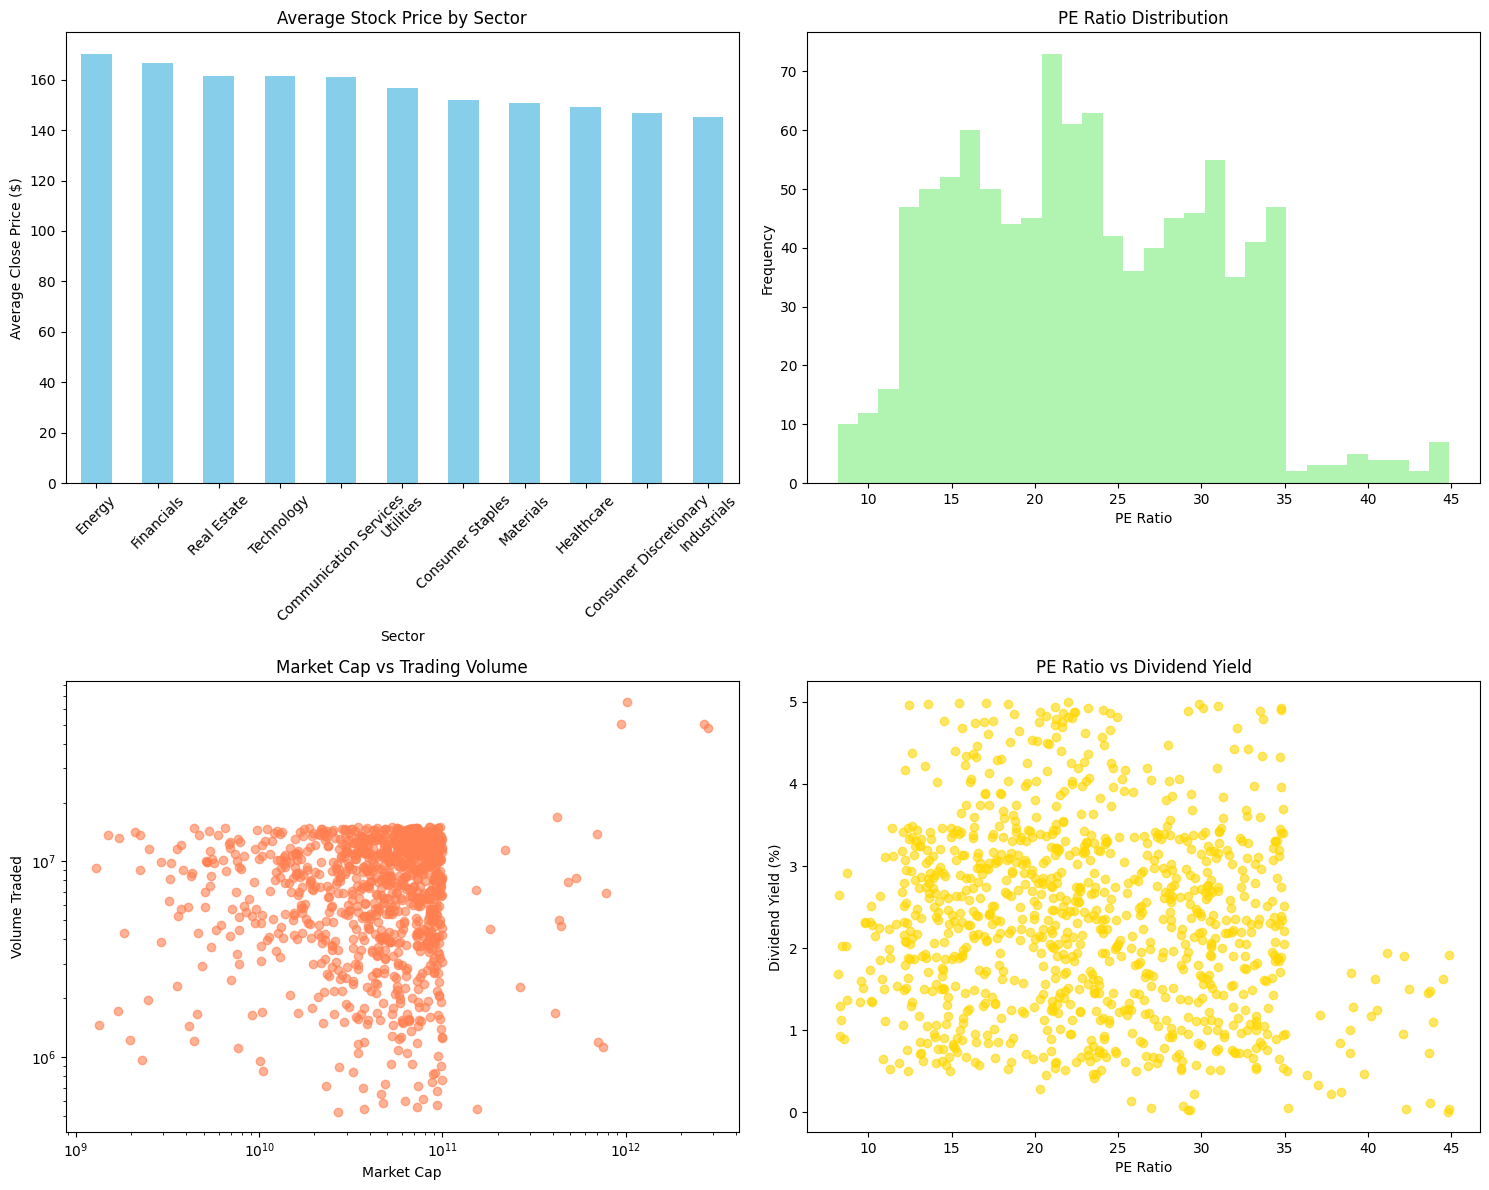

In [51]:
if data_loaded:

    print("SUMMARY STATISTICS")
    stats = analyzer.generate_summary_stats()
    display(stats)


    analyzer.create_visualizations()

In [52]:
if data_loaded:
    print(" Running IBM Granite Analysis...")
    analysis_result = analyzer.analyze_with_granite(sample_size=150)

    # menyimpan hasil (kalo outputnya berhasil)
    if analysis_result:
        analyzer.save_analysis(analysis_result)
        print("\n Analysis completed successfully!")

 Running IBM Granite Analysis...

 Starting IBM Granite Analysis...
 Data sampled to 143 rows for analysis
 Processing with IBM Granite (this may take a few moments)...

 IBM GRANITE STOCK MARKET ANALYSIS
## Comprehensive Stock Market Analysis

### 1. MARKET OVERVIEW & TRENDS

The dataset comprises 143 records, evenly distributed across five sectors: Communication Services, Consumer Discretionary, Consumer Staples, Energy, and Financials. Key statistics indicate an average close price of $155.34, an average PE ratio of 23.31, and an average dividend yield of 2.37%.

Observing the sample data, we see a mix of positive and negative daily returns, with volatility varying across stocks. The Communication Services sector dominates the sample, with tickers such as WZG, GWD, RIU, RPE, QIT, VKE, API, NSY, YDP, KJA, PPT, and GGU.

### 2. SECTOR ANALYSIS

#### Communication Services
- **Dominant Sector**: 13 out of 143 records.
- **Average Close Price**: $160.08 (based on sample data).
- **Avera

In [53]:
# tambahan aja
if data_loaded:
    print("🔍 QUICK DATA EXPLORATION:")


    print("\nColumn Data Types:")
    print(analyzer.df.dtypes)


    print("\nMissing Values:")
    missing_values = analyzer.df.isnull().sum()
    print(missing_values[missing_values > 0])


    if 'Sector' in analyzer.df.columns:
        print(f"\nUnique Sectors ({analyzer.df['Sector'].nunique()}):")
        print(analyzer.df['Sector'].unique())

🔍 QUICK DATA EXPLORATION:

Column Data Types:
Date              datetime64[ns]
Ticker                    object
Open Price               float64
Close Price              float64
High Price               float64
Low Price                float64
Volume Traded              int64
Market Cap               float64
PE Ratio                 float64
Dividend Yield           float64
EPS                      float64
52 Week High             float64
52 Week Low              float64
Sector                    object
Daily_Return             float64
Volatility               float64
dtype: object

Missing Values:
Series([], dtype: int64)

Unique Sectors (11):
['Industrials' 'Energy' 'Healthcare' 'Technology' 'Consumer Staples'
 'Materials' 'Financials' 'Consumer Discretionary' 'Real Estate'
 'Communication Services' 'Utilities']
